In [258]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
from scipy.misc import derivative
import sympy as sym
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit

In [259]:
## QUESTÃO 1

In [260]:
am1 = np.loadtxt("./amostra1.dat")
am2 = np.loadtxt("./amostra2.dat")

In [261]:
am1.shape

(10002,)

In [262]:
am2.shape

(10002,)

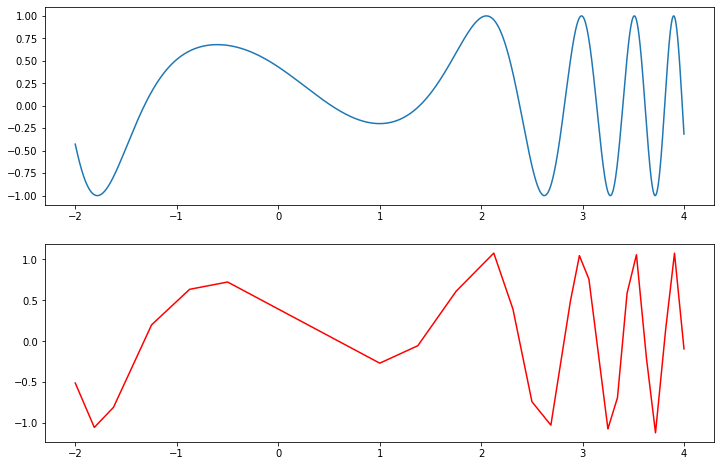

In [263]:

x1 = np.linspace(-2,4,num=am1.size)
tck1 = interpolate.splrep(x1,am1,k=1,s=20)
y1 = interpolate.splev(x1, tck1)

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(x1,am1)
plt.subplot(2,1,2)
plt.plot(x1,y1,'red')
plt.show()

In [264]:
am2[np.isnan(am2)] = 0

In [265]:
am2.shape

(10002,)

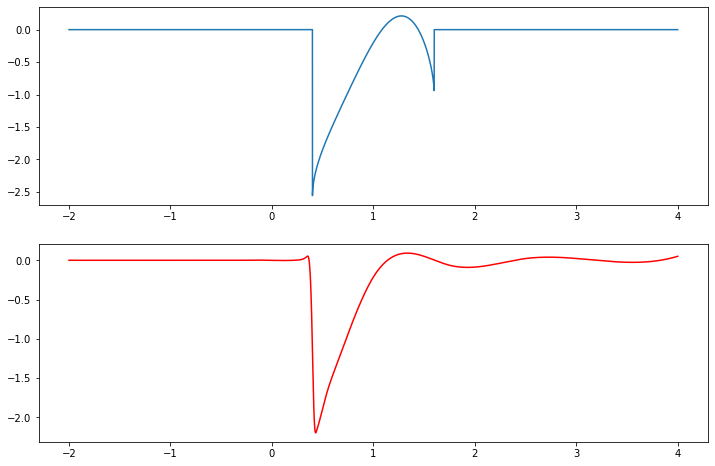

In [266]:


x2 = np.linspace(-2,4,num=am2.size)
tck2 = interpolate.splrep(x2,am2,k=3,s=100)
y2 = interpolate.splev(x2,tck2)

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(x2, am2)
plt.subplot(2,1,2)
plt.plot(x2, y2, 'red')
plt.show()

In [267]:
## QUESTÃO 2

In [268]:
int11 = integrate.quad(lambda x: interpolate.splev(x,tck1,), -2, 4)

<ipython-input-268-9549778080d4>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int11 = integrate.quad(lambda x: interpolate.splev(x,tck1,), -2, 4)


In [269]:
int11

(0.7115949695292809, 4.575882433728516e-06)

In [301]:
int12 = integrate.quad(lambda x: interpolate.splev(x,tck2), -2, 4)

In [302]:
int12

(-0.7116654354717401, 4.031443016778145e-09)

In [303]:
int21 = np.trapz(interpolate.splev(x1,tck1),np.linspace(-2,4,am1.size))

In [304]:
int21

0.711593878184717

In [305]:
int22 = np.trapz(interpolate.splev(x2,tck2),np.linspace(-2,4,am2.size))

In [306]:
int22

-0.7116654239167717

In [307]:
x = sym.Symbol('x')

In [308]:
sym.integrate(sym.atan(x**2))

x*atan(x**2) - sqrt(2)*log(4*x**2 - 4*sqrt(2)*x + 4)/4 + sqrt(2)*log(4*x**2 + 4*sqrt(2)*x + 4)/4 - sqrt(2)*atan(x**2)/2 - sqrt(2)*atan(sqrt(2)*x + 1)

In [309]:
sym.diff(sym.atan(x**2))

2*x/(x**4 + 1)

In [310]:
def f(x):
    return np.arctan(x**2)
diff = [derivative(f, i, dx=1e-6) for i in np.linspace(-2,4,1e+6)]

In [311]:
print(diff[0],diff[250000],diff[500000],diff[750000],diff[999999])

-0.2352941176342327 -0.9411743113890703 0.9999969999840985 0.12480434063988355 0.031128404631708406


In [312]:
## QUESTÃO 3

In [313]:
hub = np.genfromtxt('diagrama_de_Hubble.csv',delimiter=",",skip_header=1)[:,1:3]


In [314]:
hub.T[1].shape

(20,)

In [315]:
hub.T[0].reshape(-1,1).shape

(20, 1)

In [316]:
hub.T[1].reshape(-1,1).shape

(20, 1)

In [317]:
X = hub.T[0].reshape(-1,1)
Y = hub.T[1]
linreg = LinearRegression()
linreg.fit(X, Y)
X_test = np.linspace(1, 50, num=50).reshape(-1, 1)
Y_pred = linreg.predict(X_test)

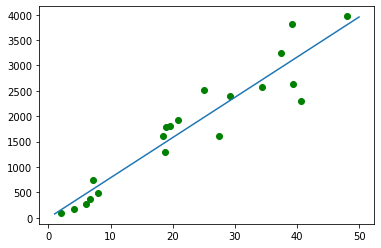

In [318]:
plt.plot(X,Y,'go',X_test,Y_pred)

In [319]:
Y_pred.shape

(50,)

In [320]:
X_test.reshape(50).shape

(50,)

In [321]:
coefAng = np.array(Y_pred) / np.array(X_test.reshape(50))
coefAng

array([76.71638236, 77.91728271, 78.31758282, 78.51773288, 78.63782292,
       78.71788294, 78.77506867, 78.81795797, 78.85131631, 78.87800299,
       78.89983754, 78.918033  , 78.93342916, 78.94662586, 78.95806301,
       78.96807051, 78.97690066, 78.98474969, 78.99177249, 78.99809302,
       79.0038116 , 79.0090103 , 79.01375694, 79.01810803, 79.02211103,
       79.02580611, 79.02922748, 79.03240446, 79.03536234, 79.03812303,
       79.04070562, 79.04312679, 79.04540122, 79.04754186, 79.04956018,
       79.05146637, 79.05326953, 79.05497778, 79.05659842, 79.05813804,
       79.05960255, 79.06099733, 79.06232723, 79.06359668, 79.06480971,
       79.06597   , 79.06708092, 79.06814554, 79.06916672, 79.07014704])

In [322]:
print(np.mean(coefAng))

78.90205916718601


In [323]:
err1 = np.loadtxt("./erros1.dat")
err2 = np.loadtxt("./erros2.dat")

In [324]:
# Pode-se alterar o grau para aumentar o polinômio a ser ajustado.
# Quanto maior o grau, mais próximo da função original
grau1 = 20
u1 = np.polyfit(x1, am1, deg=grau1,w=err1)
Yp1 = sum([u1[i]*x1**(grau1-i) for i in range(grau1+1)])

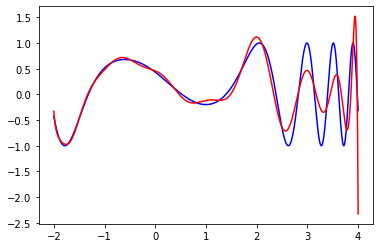

In [325]:
plt.plot(x1,am1,'blue',x1,Yp1,'red')

In [326]:
# Pode-se alterar o grau para aumentar o polinômio a ser ajustado.
# Quanto maior o grau, mais próximo da função original
grau2 = 20
u2 = np.polyfit(x2, am2, deg=grau2,w=err2)
Yp2 = sum([u2[i]*x2**(grau2-i) for i in range(grau2+1)])

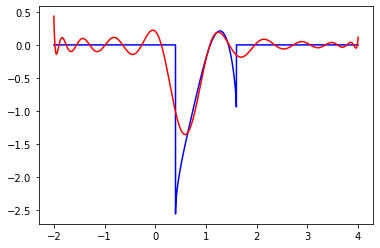

In [327]:
plt.plot(x2,am2,'blue',x2,Yp2,'red')

In [328]:
def pol_4(x,a,b,c,d,e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

v1 = curve_fit(pol_4, x1, am1,sigma=err1)[0]
yp1 = pol_4(x1, v1[0],v1[1],v1[2],v1[3],v1[4])

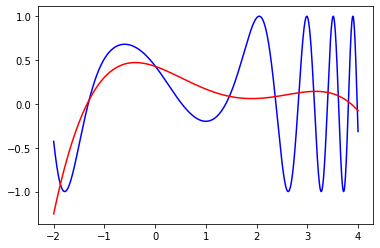

In [329]:
plt.plot(x1,am1,'blue',x1,yp,'red')

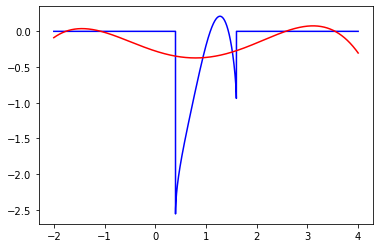

In [330]:
v2 = curve_fit(pol_4, x2, am2, sigma=err2)[0]
yp2 = pol_4(x2, v2[0],v2[1],v2[2],v2[3],v2[4])

plt.plot(x2,am2,'blue',x2,yp2,'red')